In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.keras.layers import Dense, Dropout, LSTM,Conv1D, TimeDistributed, Flatten, SpatialDropout1D, GlobalAveragePooling1D, SimpleRNN, MaxPooling1D, GlobalMaxPooling1D, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, f1_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_score, classification_report
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
from numpy import genfromtxt

/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/niall/opt/anaconda3/envs/DCUML

In [5]:
input_file = '/Users/niall/Documents/Cypress_Code/Data/AWGN/noise_data_awgn_snrminusfifteen_final.csv'
my_data_flipped = genfromtxt(input_file, delimiter=',')

In [6]:
new_data = np.delete(my_data_flipped, (0), axis=0)

In [7]:
X2 = np.delete(new_data, (0,32), axis=1)

In [8]:
Y2 = new_data[:,32]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.25, random_state=42)

In [10]:
X_train = np.array(X_train).reshape((np.shape(X_train)[0], 1, np.shape(X_train)[1]))
X_test = np.array(X_test).reshape((np.shape(X_test)[0], 1, np.shape(X_test)[1]))

# 1. Build LSTM Network

In [19]:
num_neurons = 31
num_features = 31


model = Sequential()
model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=True))
model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

print("inputs: " , model.input_shape)
print("outputs: ", model.output_shape)
print("actual inputs: ", np.shape(X_train))
print("actual outputs: ", np.shape(y_train))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 31)             7812      
_________________________________________________________________
lstm_3 (LSTM)                (None, 31)                7812      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 32        
Total params: 15,656
Trainable params: 15,656
Non-trainable params: 0
_________________________________________________________________
inputs:  (None, 1, 31)
outputs:  (None, 1)
actual inputs:  (225000, 1, 31)
actual outputs:  (225000,)


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
print('Training LSTM...')

batch_size = 5

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)

Training LSTM...
Train on 225000 samples, validate on 75000 samples
Epoch 1/5
225000/225000 [==============================] - 258s 1ms/sample - loss: 0.6334 - acc: 0.6663 - val_loss: 0.6302 - val_acc: 0.6675
Epoch 2/5
225000/225000 [==============================] - 246s 1ms/sample - loss: 0.6299 - acc: 0.6664 - val_loss: 0.6300 - val_acc: 0.6675
Epoch 3/5
225000/225000 [==============================] - 248s 1ms/sample - loss: 0.6283 - acc: 0.6664 - val_loss: 0.6304 - val_acc: 0.6675
Epoch 4/5
225000/225000 [==============================] - 268s 1ms/sample - loss: 0.6264 - acc: 0.6664 - val_loss: 0.6301 - val_acc: 0.6675
Epoch 5/5
75000/75000 [==============================] - 24s 322us/sample - loss: 0.6308 - acc: 0.6675


In [23]:
print('score:', score)
print('accuracy:', acc)

score: 0.6307746532678604
accuracy: 0.66749334


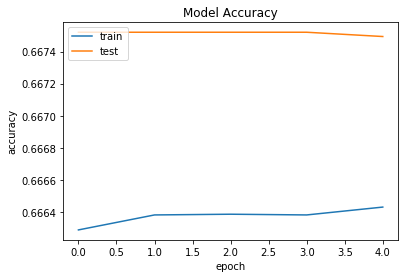

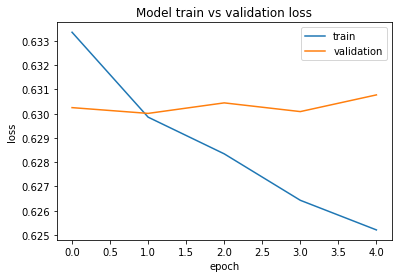

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [25]:
# Let's save the model to disc
json = model.to_json()
with open("/Users/niall/Documents/Cypress_Code/Models/AWGN_Models/model_one_snrminusten.json", "w") as file:
    file.write(json)
model.save_weights("/Users/niall/Documents/Cypress_Code/Models/AWGN_Models/model_one_snrminusten.h5")
print("Saved model to disc")

Saved model to disc


In [12]:
# Load the model of interest
json_file = open('/Users/niall/Documents/Cypress_Code/Models/LSTM/AWGN_Models/model_one_snrminusfifteen.json', 'r')
json = json_file.read()
json_file.close()
model_one_from_disc = model_from_json(json)
model_one_from_disc.load_weights("/Users/niall/Documents/Cypress_Code/Models/LSTM/AWGN_Models/model_one_snrminusfifteen.h5")

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
y_pred_from_disk = model_one_from_disc.predict(X_test, batch_size=1, verbose=1)

75000/75000 [==============================] - 88s 1ms/sample


In [32]:
pred_df = pd.DataFrame(y_pred_from_disk, columns =['Y_pred']) 
pred_df['Label'] = y_test

In [29]:
pred.to_csv('/Users/niall/Documents/Cypress_Code/Predictions/AWGN/model_one_snrminusten.csv', index = False)

In [33]:
y_pred_ref_ref = pred_df[pred_df['Label'] == 1]
y_pred_ref_ref.head()

,Y_pred,Label
0,0.319673,1.0
1,0.405891,1.0
5,0.466122,1.0
8,0.364057,1.0
20,0.275542,1.0


In [34]:
y_pred_non_ref = pred_df[pred_df['Label'] == 0]
y_pred_non_ref.head()

,Y_pred,Label
2,0.367378,0.0
3,0.410317,0.0
4,0.319634,0.0
6,0.319507,0.0
7,0.360720,0.0


Text(0.5, 1.0, 'All y_preds flip_bits')

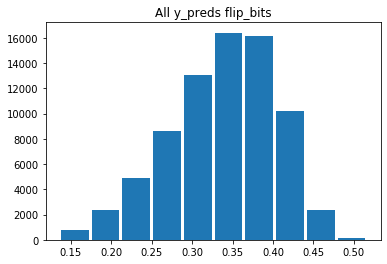

In [36]:
plt.hist(y_pred_from_disk, rwidth=0.9)
plt.title('All y_preds flip_bits')

Text(0.5, 1.0, 'Ref_Ref y_preds flip bits')

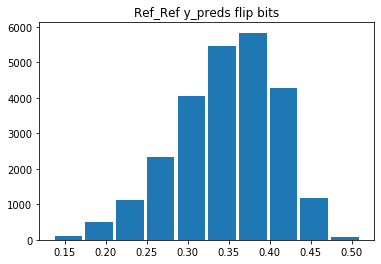

In [37]:
plt.hist(y_pred_ref_ref['Y_pred'], rwidth=0.9)
plt.title('Ref_Ref y_preds flip bits')

Text(0.5, 1.0, 'Not Ref_Ref y_preds flip_bits')

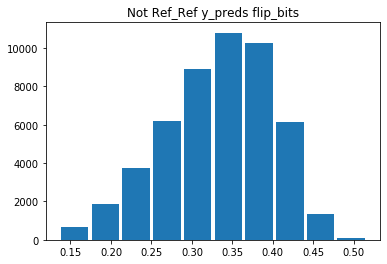

In [38]:
plt.hist(y_pred_non_ref['Y_pred'], rwidth=0.9)
plt.title('Not Ref_Ref y_preds flip_bits')

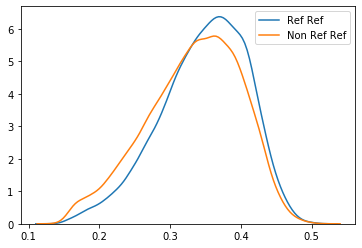

In [39]:
ax = sns.kdeplot(y_pred_ref_ref['Y_pred'], label='Ref Ref')
sns.kdeplot(y_pred_non_ref['Y_pred'],label='Non Ref Ref', ax=ax)

In [14]:
def metrics(pred_tag, y_test):
    print("F1-score: ", f1_score(pred_tag, y_test))
    print("Precision: ", precision_score(pred_tag, y_test))
    print("Recall: ", recall_score(pred_tag, y_test))
    print("Acuracy: ", accuracy_score(pred_tag, y_test))
    print("-"*50)
    print(classification_report(pred_tag, y_test))
    
preds_new = model_one_from_disc.predict_classes(X_test)
metrics(preds_new, y_test)

F1-score:  0.0
Precision:  0.0
Recall:  0.0
Acuracy:  0.66752
--------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80     75000
         1.0       0.00      0.00      0.00         0

    accuracy                           0.67     75000
   macro avg       0.50      0.33      0.40     75000
weighted avg       1.00      0.67      0.80     75000

